Q1

In [ ]:
import pandas as pd
wine_data = pd.read_csv('/content/wine_data.csv')
most_frequent_quality = wine_data['quality'].mode()[0]
print(f"The most frequently occurring wine quality is: {most_frequent_quality}")
highest_quality = wine_data['quality'].max()
lowest_quality = wine_data['quality'].min()
print(f"The highest quality score is: {highest_quality}")
print(f"The lowest quality score is: {lowest_quality}")


The most frequently occurring wine quality is: 5
The highest quality score is: 8
The lowest quality score is: 3


Q2

In [ ]:
import pandas as pd
wine_data = pd.read_csv('/content/wine_data.csv')
correlation_matrix = wine_data.corr()

fixed_acidity_corr = correlation_matrix.loc['quality', 'fixed acidity']
alcohol_corr = correlation_matrix.loc['quality', 'alcohol']
free_sulfur_dioxide_corr = correlation_matrix.loc['quality', 'free sulfur dioxide']

print(f"Correlation between fixed acidity and quality: {fixed_acidity_corr}")
print(f"Correlation between alcohol content and quality: {alcohol_corr}")
print(f"Correlation between free sulfur dioxide and quality: {free_sulfur_dioxide_corr}")


Correlation between fixed acidity and quality: 0.12405164911322257
Correlation between alcohol content and quality: 0.4761663239995377
Correlation between free sulfur dioxide and quality: -0.05065605724427594


Q3

In [ ]:
import pandas as pd
wine_data = pd.read_csv('/content/wine_data.csv')
best_quality_wine = wine_data[wine_data['quality'] == highest_quality]
lowest_quality_wine = wine_data[wine_data['quality'] == lowest_quality]

# Calculate the average residual sugar for the best and lowest quality wines
average_residual_sugar_best = best_quality_wine['residual sugar'].mean()
average_residual_sugar_lowest = lowest_quality_wine['residual sugar'].mean()

print(f"Average Residual Sugar for the Best Quality Wine (quality={highest_quality}): {average_residual_sugar_best:.2f} g/L")
print(f"Average Residual Sugar for the Lowest Quality Wine (quality={lowest_quality}): {average_residual_sugar_lowest:.2f} g/L")

Average Residual Sugar for the Best Quality Wine (quality=8): 2.58 g/L
Average Residual Sugar for the Lowest Quality Wine (quality=3): 2.64 g/L


Q4

Correlation between Volatile Acidity and Quality: -0.39
There is a strong negative correlation between Volatile Acidity and Quality.
Wine with higher volatile acidity tend to have lower quality (or) as volatile acidity increases, quality decreases



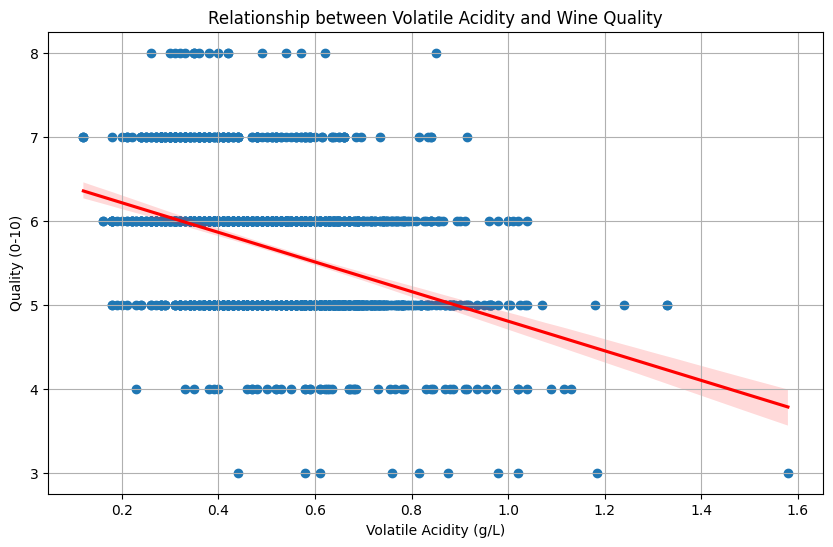

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
wine_data = pd.read_csv('/content/wine_data.csv')

correlation = wine_data['volatile acidity'].corr(wine_data['quality'])
print(f"Correlation between Volatile Acidity and Quality: {correlation:.2f}")
if correlation > 0:
    print("There is a positive correlation between Volatile Acidity and Quality.")
    print("Wine with higher volatile acidity tend to have higher quality (or) as volatile acidity increases, quality increases ")
elif correlation < 0:
    print("There is a strong negative correlation between Volatile Acidity and Quality.")
    print("Wine with higher volatile acidity tend to have lower quality (or) as volatile acidity increases, quality decreases")
else:
    print("There is no correlation between Volatile Acidity and Quality.")
print()
# Create a scatter plot with a regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='volatile acidity', y='quality', data=wine_data, scatter_kws={'alpha':1.0}, line_kws={'color':'red'})
plt.title('Relationship between Volatile Acidity and Wine Quality')
plt.xlabel('Volatile Acidity (g/L)')
plt.ylabel('Quality (0-10)')
plt.grid(True)
plt.show()

Q5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

wine_data = pd.read_csv('/content/wine_data.csv')
# Prepare the feature matrix (X) and the target vector (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
# Predict and evaluate the Decision Tree model
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Model Accuracy: {accuracy_tree:.2f}")
# Predict and evaluate the Random Forest model
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Model Accuracy: {accuracy_forest:.2f}")

Decision Tree Model Accuracy: 0.56
Random Forest Model Accuracy: 0.66


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')




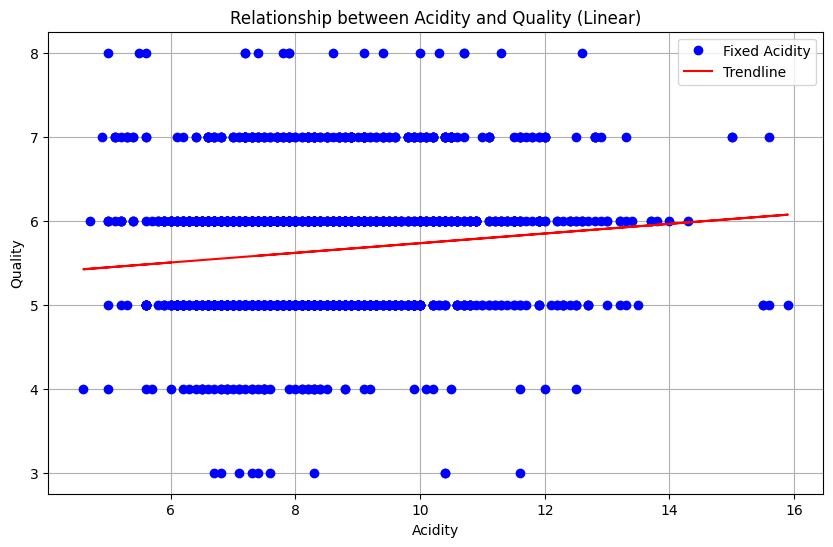

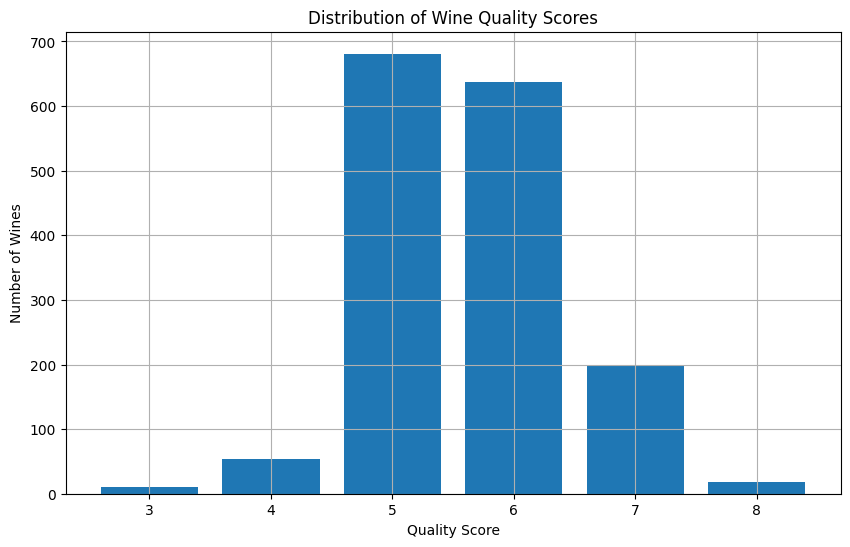

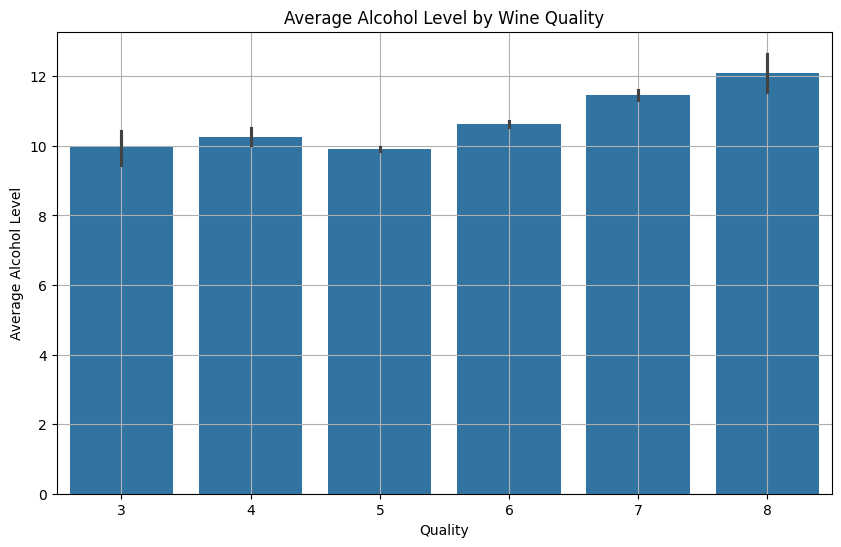

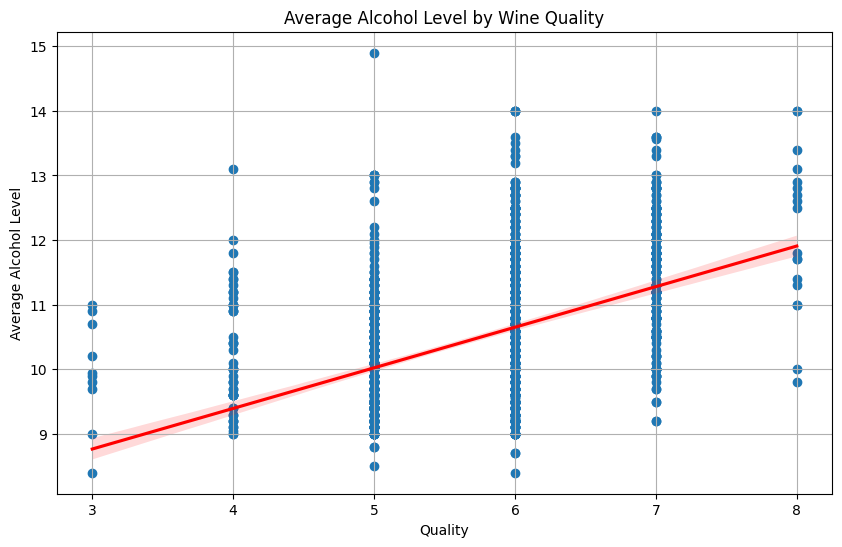

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data (replace with your actual data)
wine_data = pd.read_csv('/content/wine_data.csv')

# Check the available columns in your DataFrame
print(wine_data.columns)
print()

# Linear plot (optional) - Acidity vs Quality with trendline
plt.figure(figsize=(10, 6))
plt.plot(wine_data["fixed acidity"], wine_data["quality"], 'o', color="blue", label="Fixed Acidity")
m, b = np.polyfit(wine_data["fixed acidity"], wine_data["quality"], 1)  # Use np.polyfit for linear regression
plt.plot(wine_data["fixed acidity"], m * wine_data["fixed acidity"] + b, color="red", label="Trendline")
plt.xlabel("Acidity")
plt.ylabel("Quality")
plt.title("Relationship between Acidity and Quality (Linear)")
plt.legend()
plt.grid(True)
print()
plt.show()

# Bar plot - Quality distribution by Wine Type (if 'type' column exists)
if 'type' in wine_data.columns:
  plt.figure(figsize=(8, 8))
  plt.bar(wine_data['type'].value_counts().index, wine_data['type'].value_counts().values)
  plt.xlabel("Wine Type")
  plt.ylabel("Number of Wines")
  plt.title("Wine Quality Distribution by Type")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.legend()
  plt.grid(True)
  print()
  plt.show()

# Bar chart - Quality distribution (overall)
plt.figure(figsize=(10, 6))
plt.bar(wine_data['quality'].value_counts().index, wine_data['quality'].value_counts().values)
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.title("Distribution of Wine Quality Scores")
plt.xticks(rotation=0)  # No rotation for quality scores (categorical)
plt.grid(True)
print()
plt.show()

# Box plot - Alcohol vs Quality
plt.figure(figsize=(10, 6))
sns.barplot(x="quality", y="alcohol", data=wine_data)  # Use sns.barplot for bar chart
plt.xlabel("Quality")
plt.ylabel("Average Alcohol Level")  # Label angepasst für Balkendiagramm
plt.title("Average Alcohol Level by Wine Quality")
plt.grid(True)
print()
plt.show()

# (Repeat for other data insights as needed)
plt.figure(figsize=(10, 6))
sns.regplot(x='quality', y='alcohol', data=wine_data, scatter_kws={'alpha':1.0}, line_kws={'color':'red'})
plt.xlabel("Quality")
plt.ylabel("Average Alcohol Level")  # Label angepasst für Balkendiagramm
plt.title("Average Alcohol Level by Wine Quality")
plt.grid(True)
print()
plt.show()
